# Hotels in Amsterdam

This Jupyter Notebook shows the analysis of 

In [3]:
#importing libraries
import pandas as pd
import statsmodels.formula.api as smf
from stargazer.stargazer import Stargazer
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from statsmodels.nonparametric.smoothers_lowess import lowess
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import log_loss
import seaborn as sns
from plotnine import ggplot

## Data Work

In [5]:
#reading csv files
hotel_features = pd.read_csv('hotels-europe_features.csv')
hotel_prices = pd.read_csv('hotels-europe_price.csv')

In [6]:
#df1 where city is Amsterdam
df1 = pd.DataFrame(hotel_features)
df1 = df1.loc[df1['city'] == 'Amsterdam']

In [7]:
#seeing df2
df2 = pd.DataFrame(hotel_prices)
df2.head()

,hotel_id,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room
0,1,172,0,0% no offer,2017,11,1,0,1,0
1,1,122,1,15-50% offer,2018,1,1,0,1,0
2,1,122,1,15-50% offer,2017,12,0,1,1,0
3,1,552,1,1-15% offer,2017,12,0,1,4,0
4,1,122,1,15-50% offer,2018,2,1,0,1,0


In [8]:
#merging 2 dfs 
df = pd.merge(df1, df2, on = 'hotel_id')
df.head()

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,accommodation_type,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room
0,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,172,0,0% no offer,2017,11,1,0,1,0
1,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,122,1,15-50% offer,2018,1,1,0,1,0
2,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,122,1,15-50% offer,2017,12,0,1,1,0
3,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,552,1,1-15% offer,2017,12,0,1,4,0
4,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,Hotel,122,1,15-50% offer,2018,2,1,0,1,0


In [9]:
#use hotel user ratings to create a binary variable: highly_rated=1 if rating ≥ 4, 0 otherwise 0 .
#Examine how high rating is related to the other hotel features in the data. Make sure to
#document and argue for the data cleaning/filtering decisions you make.
df.columns

Index(['hotel_id', 'city', 'distance', 'stars', 'rating', 'country',
       'city_actual', 'rating_reviewcount', 'center1label', 'center2label',
       'neighbourhood', 'ratingta', 'ratingta_count', 'distance_alter',
       'accommodation_type', 'price', 'offer', 'offer_cat', 'year', 'month',
       'weekend', 'holiday', 'nnights', 'scarce_room'],
      dtype='object')

In [10]:
#creating dummy variable
df['highly_rated'] = (df['rating'] >= 4).astype(int)
df = df.dropna(subset=['rating'])

In [11]:
df.highly_rated

0       1
1       1
2       1
3       1
4       1
       ..
2053    0
2054    0
2055    0
2056    0
2057    0
Name: highly_rated, Length: 2045, dtype: int64

In [12]:
#dropping na values for distance and stars
df = df.dropna(subset=['distance'])
df = df.dropna(subset=['stars'])

In [13]:
df.head()

,hotel_id,city,distance,stars,rating,country,city_actual,rating_reviewcount,center1label,center2label,...,price,offer,offer_cat,year,month,weekend,holiday,nnights,scarce_room,highly_rated
0,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,172,0,0% no offer,2017,11,1,0,1,0,1
1,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,122,1,15-50% offer,2018,1,1,0,1,0,1
2,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,122,1,15-50% offer,2017,12,0,1,1,0,1
3,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,552,1,1-15% offer,2017,12,0,1,4,0,1
4,1,Amsterdam,3.1,4.0,4.3,Netherlands,Amsterdam,1030.0,City centre,Montelbaanstoren,...,122,1,15-50% offer,2018,2,1,0,1,0,1


## Linear Probability Model (LPM): `distance and stars`

In [41]:
x_vars = sm.add_constant(df[['distance', 'stars']])
# Model LPM
model = sm.OLS(df['highly_rated'], x_vars)
# Fit the model
# Have to control for heteroskedasticity with LPM:
result1 = model.fit(cov_type = 'HC1')
# Print summary
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:           highly_rated   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     1018.
Date:                Sun, 03 Dec 2023   Prob (F-statistic):          2.31e-307
Time:                        14:59:15   Log-Likelihood:                -1017.0
No. Observations:                2045   AIC:                             2040.
Df Residuals:                    2042   BIC:                             2057.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4371      0.025    -17.147      0.0

### Analysis:

-(constant coefficient) the constant coefficient doesn't seem to have an interpretable meaning here. It is also negative (despite the depedent variable ranging from 0-1 (limitations of LPM)).

-(distance coefficient) for one unit increase in distance, hotels are more likely to be highly rated by 2.7 percentage points. p value is 0 (or near 0) meaning `distance` is statistically significant (most likely a relationship between distance and probability of a hotel being highly_rated (having more than 4 stars)).

-(stars coefficient) for one unit increase in stars, hotels are more likely to be highly raetd by 28.7 percentage points. p value is 0 (or near 0) meaning `stars` is statistically significant (most likely a relationship between stars and probability of a hotel being highly_rated (having more than 4 stars)).


In [1]:
# Limitations of LPM: coefficients can fall out of the range of [0,1] which doesn't make sense for 
# our dependent variable (as seen with the constant coefficient). This model also assumes linearity which is why it is better to use the logit or probit
# models. 

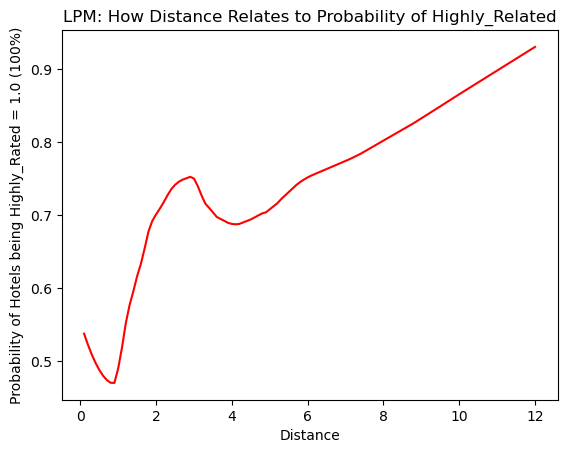

In [14]:
#Linear Probability Model (LPM) 
data_distance = lowess(df['highly_rated'], df['distance'])
# Plot the smoothed data
plt.plot(data_distance[:, 0], data_distance[:, 1], color='red', label='Distance')
plt.xlabel('Distance')
plt.ylabel('Probability of Hotels being Highly_Rated = 1.0 (100%)')
plt.title('LPM: How Distance Relates to Probability of Highly_Related')
plt.show()
#looks like as distance increases, ratings get higher???

The line represents an estimate of the relationship between 'distance' and the probability of hotels highly rated. For the most part, the line is increasing, suggesting a positive relationship: as 'distance' increases, the probability of being highly rated also increases.

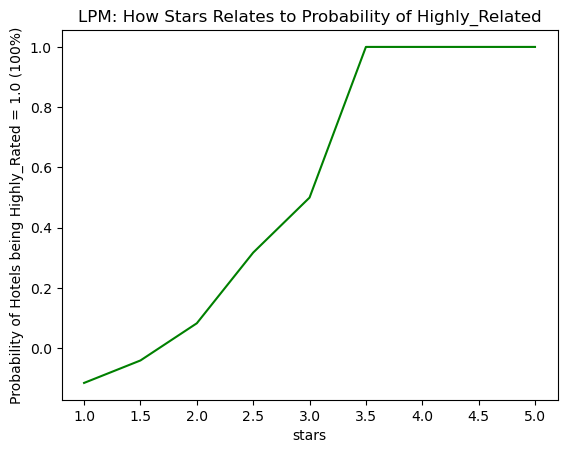

In [15]:
#Linear Probability Model (LPM) 
data_distance = lowess(df['highly_rated'], df['stars'])
# Plot the smoothed data
plt.plot(data_distance[:, 0], data_distance[:, 1], color='green', label='Distance')
plt.xlabel('stars')
plt.ylabel('Probability of Hotels being Highly_Rated = 1.0 (100%)')
plt.title('LPM: How Stars Relates to Probability of Highly_Related')
plt.show()
#looks like as stars increase, ratings get higher

The line represents an estimate of the relationship between 'stars' and the probability of hotels highly rated. For the most part, the line is increasing, suggesting a positive relationship: as 'stars' increases, the probability of being highly rated also increases. However, the line plateaus at 3.5 stars (the probability of hotels being highly rated stays constant from 3.5 stars onward).

## Logit Regression

In [45]:
#Logit Regression Results (table)
#x_variable + covariate
x_vars = df[['distance', 'stars']]
#adding intercept/constant
x_vars = sm.add_constant(x_vars)
#modeling Logit
model = sm.Logit(df['highly_rated'], x_vars)
#robust SE 
result2 = model.fit(cov_type = 'HC1')
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.472526
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           highly_rated   No. Observations:                 2045
Model:                          Logit   Df Residuals:                     2042
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.3038
Time:                        14:59:16   Log-Likelihood:                -966.32
converged:                       True   LL-Null:                       -1387.9
Covariance Type:                  HC1   LLR p-value:                8.069e-184
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7932      0.291    -19.910      0.000      -6.363      -5.223
distance       0.1466      0.

Logit Regression Model coefficients are not very informative as they represent log-odds. We need marginal differences in order to make sense of our model.

In [46]:
marginal_effects = result2.get_margeff()

In [47]:
# Print marginal effects summary
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:           highly_rated
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0227      0.004      5.657      0.000       0.015       0.031
stars          0.2742      0.007     39.702      0.000       0.261       0.288


### Analysis:

-(distance coefficient) for one unit increase in distance, hotels are more likely to be highly rated by 2.27 percentage points. p value is 0 (or near 0) meaning `distance` is statistically significant (most likely a relationship between distance and probability of a hotel being highly_rated (having more than 4 stars)).

-(stars coefficient) for one unit increase in stars, hotels are more likely to be highly raetd by 27.42 percentage points. p value is 0 (or near 0) meaning `stars` is statistically significant (most likely a relationship between stars and probability of a hotel being highly_rated (having more than 4 stars)).

In [48]:
predicted_probabilities2 = result2.predict(x_vars)
predicted_probabilities2.mean()
#predicted probability is around 0.5 = it indicates uncertainty or ambiguity in predicting the outcome.

0.5848410757946211

## Probit Regression

In [49]:
#Probit
#x_variable + covariate
x_vars = df[['distance', 'stars']]
#adding intercept/constant
x_vars = sm.add_constant(x_vars)
#modeling Logit
model = sm.Probit(df['highly_rated'], x_vars)
#robust SE 
result3 = model.fit(cov_type = 'HC1')
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.473366
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:           highly_rated   No. Observations:                 2045
Model:                         Probit   Df Residuals:                     2042
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Dec 2023   Pseudo R-squ.:                  0.3025
Time:                        14:59:17   Log-Likelihood:                -968.03
converged:                       True   LL-Null:                       -1387.9
Covariance Type:                  HC1   LLR p-value:                4.501e-183
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3423      0.158    -21.117      0.000      -3.652      -3.032
distance       0.0788      0.

In [50]:
marginal_effects = result3.get_margeff()

In [51]:
# Print marginal effects summary
print(marginal_effects.summary())

       Probit Marginal Effects       
Dep. Variable:           highly_rated
Method:                          dydx
At:                           overall
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
distance       0.0211      0.004      5.425      0.000       0.013       0.029
stars          0.2742      0.007     40.272      0.000       0.261       0.288


### Analysis:

-(distance coefficient) for one unit increase in distance, hotels are more likely to be highly rated by 2.11 percentage points. p value is 0 (or near 0) meaning `distance` is statistically significant (most likely a relationship between distance and probability of a hotel being highly_rated (having more than 4 stars)).

-(stars coefficient) for one unit increase in stars, hotels are more likely to be highly raetd by 27.42 percentage points. p value is 0 (or near 0) meaning `stars` is statistically significant (most likely a relationship between stars and probability of a hotel being highly_rated (having more than 4 stars)).


In [52]:
predicted_probabilities3 = result3.predict(x_vars)
predicted_probabilities3.mean()
#predicted probability is around 0.5 = it indicates uncertainty or ambiguity in predicting the outcome.

0.5849936475709

### Fit of Predicted Probabilities

In [53]:
df["pred_lpm"] = result1.predict()
df["pred_logit"] = result2.predict()
df["pred_probit"] = result3.predict()

In [54]:
#Fit of predicted probabilities:
pd.DataFrame(
    {
        "R-squared": [
            result1.rsquared,
            r2_score(df["highly_rated"], df["pred_logit"]),
            r2_score(df["highly_rated"], df["pred_probit"]),
        ],
        "Brier-score": [
            mean_squared_error(df["highly_rated"], df["pred_lpm"]),
            mean_squared_error(df["highly_rated"], df["pred_logit"]),
            mean_squared_error(df["highly_rated"], df["pred_probit"]),
        ],}, index=["LPM", "Logit", "Probit"],).T.round(3)


,LPM,Logit,Probit
R-squared,0.348,0.367,0.365
Brier-score,0.158,0.154,0.154


Logit model to predict probability of being highly rated has the best fit (highest R-squared/low Brier-score)

### Summary:

Distance from city center and Stars seem to both have a positive relationship with hotels being highly rated. This was expected from stars, but not from distance. However, both variables are statistically significant and therefore we can assume the relatinship is meaningful. 